<a href="https://colab.research.google.com/github/comooney711/DSPS_CMooney/blob/main/HW7/ClusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [ ]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv")

# 1. explore the data. 

In [ ]:
genes.head()
genes.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000
mean,1302.000000,-0.074268,-0.005045,0.005219,-0.079438,-0.042794,0.015155,-0.059323,-0.039752,-0.087955,0.000902,-0.041196,-0.015011,-0.034671,-0.112678,-0.048054,-0.012752,-0.002154,-0.023367,-0.008875,-0.043155,-0.010581,-0.046829,-0.017217,-0.018598,-0.064104,-0.019154,-0.013590,-0.050083,-0.005277,-0.012565,-0.020906,0.000761,0.024507,-0.113173,-0.029828,-0.061770,-0.013789,-0.023064,-0.029895,-0.003806,-0.054352,-0.002723,-0.039034,-0.017288,-0.030980,-0.004383,-0.053051,-0.068682,-0.009360,-0.075672,-0.093618,-0.033892,-0.112174,-0.074965,-0.014106,-0.071248,0.035666,-0.008715,-0.017194,-0.200595,-0.037934,-0.015484,-0.019799,-0.031708,-0.038404,-0.032761,-0.001378,-0.022449,0.026098,-0.064188,-0.027919,0.007936,-0.114165,-0.010700
std,751.565699,0.493931,0.346347,0.331848,0.692972,0.428889,0.339398,0.380021,0.351449,0.455828,0.345493,0.362652,0.447326,0.540023,0.580710,0.496429,0.543310,0.465740,0.387973,0.397993,0.425933,0.403002,0.451923,0.428803,0.336798,0.462792,0.488627,0.407588,0.467046,0.371725,0.383642,0.406435,0.441833,0.378632,0.629972,0.416798,0.493904,0.443052,0.431308,0.421408,0.532214,0.398046,0.461719,0.483934,0.392557,0.403347,0.448873,0.492421,0.461677,0.386885,0.410835,0.560112,0.405502,0.514117,0.544044,0.397607,0.357038,0.409143,0.434971,0.381831,0.653300,0.359162,0.346666,0.425046,0.428582,0.484102,0.405609,0.317786,0.353947,0.395140,0.397782,0.457248,0.493876,0.533757,0.335695
min,1.000000,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.720292,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.929382,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.342742,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.356298,-3.115594,-3.055898,-2.517066,-3.152997,-2.251476,-3.860232,-2.786184,-2.578267,-2.972079,-2.115559,-2.544261,-3.074444,-2.650749,-2.215245,-2.421503,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.013660,-2.955538,-2.909000,-1.563549
25%,651.500000,-0.378801,-0.212649,-0.179065,-0.506899,-0.275926,-0.144605,-0.309324,-0.234284,-0.332753,-0.210667,-0.261666,-0.280333,-0.321668,-0.392210,-0.350457,-0.324113,-0.252442,-0.238936,-0.230974,-0.293005,-0.216682,-0.316509,-0.260370,-0.224494,-0.316412,-0.285549,-0.246799,-0.343867,-0.203991,-0.234622,-0.254897,-0.243294,-0.138720,-0.494179,-0.292053,-0.339179,-0.277470,-0.293535,-0.261606,-0.314649,-0.284501,-0.278219,-0.345054,-0.203879,-0.272156,-0.286396,-0.351555,-0.325736,-0.191825,-0.297874,-0.431941,-0.271377,-0.418970,-0.391202,-0.261430,-0.272787,-0.167300,-0.298374,-0.221744,-0.596937,-0.229019,-0.194918,-0.265233,-0.282190,-0.321877,-0.277627,-0.170285,

In [ ]:
genes.mean(0).round(2)

Unnamed: 0    1302.00
1               -0.07
2               -0.01
3                0.01
4               -0.08
               ...   
83              -0.06
84              -0.03
85               0.01
86              -0.11
87              -0.01
Length: 75, dtype: float64

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [ ]:
genes=pd.DataFrame(skl.preprocessing.scale(genes))
genes=genes.drop([2602])
genes.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
count,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2602.000000,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03,2.602000e+03
mean,-0.000665,0.000100,0.000154,-0.000409,0.000403,-0.000136,-0.000098,-0.000883,-0.000688,-0.000385,-0.000460,-0.000918,-0.000536,-0.000158,-0.000417,-0.000309,0.000102,-0.000617,-0.000091,-0.000392,-0.000251,-0.000258,1.002166e-17,2.717956e-17,-3.240639e-17,-5.120168e-17,-4.241206e-17,3.477447e-17,9.813655e-18,3.731322e-17,-4.207071e-17,-7.413576e-17,7.827990e-17,-5.179903e-17,9.898991e-17,1.506183e-17,-7.595982e-17,-2.176071e-17,-5.892460e-17,-8.200802e-17,4.751089e-17,-4.672153e-17,7.112766e-17,2.946443e-16,6.421544e-17,-1.576585e-17,3.478727e-16,5.064699e-17,1.060408e-16,-1.834727e-17,-2.816092e-18,-2.563817e-16,2.664621e-17,-3.217172e-17,3.261973e-17,-2.746810e-16,-1.312896e-16,-1.481275e-16,-1.036834e-17,-2.348877e-17,2.323276e-16,-1.169105e-17,3.125436e-18,1.261321e-16,-4.787357e-17,-3.122769e-17,-1.118757e-16,3.042233e-17,-2.534483e-17,3.754790e-18,-5.922327e-17,-1.141397e-16,1.070542e-16,-4.137949e-16,2.121669e-17
std,0.999808,1.000371,1.000354,1.000167,1.000173,1.000360,1.000372,0.999369,0.999768,1.000192,1.000109,0.999287,1.000010,1.000352,1.000158,1.000260,1.000371,0.999889,1.000374,1.000184,1.000302,1.000298,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00
min,-1.731386,-4.315094,-5.125359,-9.277393,-4.924958,-5.682492,-8.061261,-4.602288,-5.110853,-6.861077,-6.387547,-8.076489,-6.787083,-5.340037,-5.285066,-4.071895,-4.475463,-6.307249,-6.481008,-7.336356,-6.443018,-7.244038,-6.780309e+00,-6.802939e+00,-6.802360e+00,-4.795781e+00,-5.888234e+00,-7.463712e+00,-4.873677e+00,-6.289358e+00,-6.607944e+00,-6.666875e+00,-6.353055e+00,-6.313499e+00,-5.319032e+00,-6.919965e+00,-6.341249e+00,-6.929642e+00,-5.410711e+00,-7.323762e+00,-5.735812e+00,-6.188192e+00,-6.824241e+00,-4.572668e+00,-9.791409e+00,-6.832160e+00,-5.735210e+00,-5.929047e+00,-4.434417e+00,-6.553330e+00,-7.300614e+00,-4.566270e+00,-5.380428e+00,-4.492697e+00,-4.839403e+00,-5.238815e+00,-5.932914e+00,-8.768833e+00,-6.948042e+00,-5.868853e+00,-5.124021e+00,-7.057828e+00,-8.318640e+00,-5.507678e+00,-7.220983e+00,-6.008915e+00,-8.010284e+00,-8.768793e+00,-5.414931e+00,-7.488133e+00,-7.519097e+00,-6.531061e+00,-6.001596e+00,-5.237163e+00,-4.626662e+00
25%,-0.866025,-0.617014,-0.59

In [ ]:
genes.mean(0).round(2), genes.std(0)

(0    -0.0
 1     0.0
 2     0.0
 3    -0.0
 4     0.0
      ... 
 70   -0.0
 71   -0.0
 72    0.0
 73   -0.0
 74    0.0
 Length: 75, dtype: float64, 0     0.999808
 1     1.000371
 2     1.000354
 3     1.000167
 4     1.000173
         ...   
 70    1.000192
 71    1.000192
 72    1.000192
 73    1.000192
 74    1.000192
 Length: 75, dtype: float64)

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
#print( genes.isnull().any() )
#genes.iloc[:, [50]]
#genes.isnull().sum().sum()

In [ ]:
tsne = skl.manifold.TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(genes)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2602 samples in 0.024s...
[t-SNE] Computed neighbors for 2602 samples in 1.242s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2602
[t-SNE] Computed conditional probabilities for sample 2000 / 2602
[t-SNE] Computed conditional probabilities for sample 2602 / 2602
[t-SNE] Mean sigma: 2.000991
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.021843
[t-SNE] KL divergence after 1000 iterations: 1.987039


In [ ]:
tsne_results.shape

(2602, 2)

2.3 plot the TSNE projection


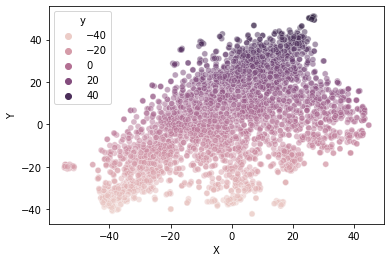

In [ ]:
x=tsne_results[:,0]
y=tsne_results[:,1]

tsne_df = pd.DataFrame({'X':tsne_results[:,0],
                        'Y':tsne_results[:,1],
                       'y':y})
#sns.scatterplot(x='X', y='Y', hue='test', data=tsne_df, legend="full", alpha=0.3)
sns.scatterplot(x='X', y='Y', alpha=0.5, hue = 'y', data=tsne_df)

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [ ]:
#delete
def calICVar(X, labels):
   ...

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

In [ ]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();


NameError: ignored

ideally you should be able to isolate the little islands, like the one on the left "at 7 hour". Try to set the starting guess in a way that may facilitate this

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

4b.3 repeat with a different linkage and comment on differences

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [ ]:
geneclustersAg.labels_

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative
